## LiH VQE  4 Qubit Example

In [1]:
#import packages
import numpy as np
import pennylane as qml
from pennylane import expval, var, device, VQECost
from run_vqe import run_vqe
pi = np.pi

In [2]:
name ='LiH';charge = 0;multiplicity=1;basis= 'sto-3g';geometry = 'lih.xyz';
h, nr_qubits = qml.qchem.generate_hamiltonian(
    name,
    geometry,
    charge,
    multiplicity,
    basis,
    mapping='jordan_wigner',
    n_active_orbitals=2,
    n_active_electrons=2,
)
print(nr_qubits)

4


In [3]:
dev = qml.device("default.qubit", wires=4)
def ansatz(params, wires=[0,1,2,3]):
    for i in wires:
        qml.RY(params[i], wires=wires[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[2], wires[3]])
    qml.CNOT(wires=[wires[1], wires[2]])
    for i in wires:
        qml.RY(params[i+4], wires=wires[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[2], wires[3]])
    qml.CNOT(wires=[wires[1], wires[2]])

In [4]:
cost = VQECost(ansatz, h, dev)

In [5]:
max_iterations = 200
step_size = 0.05
conv_tol = 1e-06
initial_params = np.random.uniform(low=0, high=2*np.pi, size=8)

print("QNG")
qng_run = run_vqe(cost, max_iterations, initial_params, 'QNGOptimizer', step_size, diag_approx=False)

print("Vanilla")
vanilla_run = run_vqe(cost, max_iterations, initial_params, 'GradientDescentOptimizer', step_size)

QNG
Iteration = 0,  Ground-state energy = -7.44611675 Ha,  Convergence parameter = 0.00859141 Ha
Iteration = 20,  Ground-state energy = -7.57417968 Ha,  Convergence parameter = 0.00562793 Ha
Iteration = 40,  Ground-state energy = -7.66918753 Ha,  Convergence parameter = 0.00339186 Ha
Iteration = 60,  Ground-state energy = -7.71078820 Ha,  Convergence parameter = 0.00127523 Ha
Iteration = 80,  Ground-state energy = -7.72914209 Ha,  Convergence parameter = 0.00070949 Ha
Iteration = 100,  Ground-state energy = -7.74104150 Ha,  Convergence parameter = 0.00051134 Ha
Iteration = 120,  Ground-state energy = -7.74978029 Ha,  Convergence parameter = 0.00037311 Ha
Iteration = 140,  Ground-state energy = -7.75597132 Ha,  Convergence parameter = 0.00025582 Ha
Iteration = 160,  Ground-state energy = -7.76009552 Ha,  Convergence parameter = 0.00016605 Ha
Iteration = 180,  Ground-state energy = -7.76272839 Ha,  Convergence parameter = 0.00010462 Ha
Vanilla
Iteration = 0,  Ground-state energy = -7.439

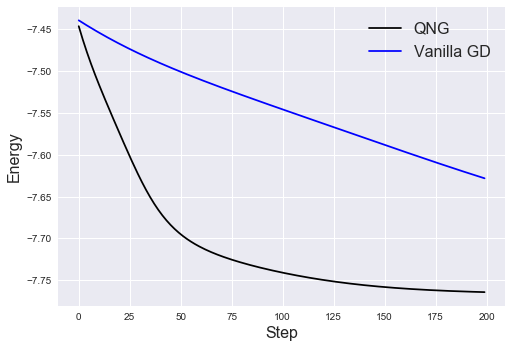

In [13]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.plot(qng_run, "black", label="QNG")
plt.plot(vanilla_run, "b", label="Vanilla GD")

plt.ylabel("Energy", fontsize=16)
plt.xlabel("Step", fontsize=16)
plt.legend(fontsize=16)
plt.show()